In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [398]:
### Importing dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

y.replace("ckd\t", "ckd", inplace=True)

# metadata 
print(chronic_kidney_disease.metadata) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

C:\Users\Kong\AppData\Local\Temp\ipykernel_17368\3973744745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace("ckd\t", "ckd", inplace=True)


In [399]:
# variable information 
print(chronic_kidney_disease.variables) 

     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                   so

In [400]:
print(X.shape)

(400, 24)


In [401]:
print(X.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object


In [402]:
cat = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

for col in cat:
    X[col] = pd.Categorical(X[col]).codes

X.head()

C:\Users\Kong\AppData\Local\Temp\ipykernel_17368\3189028678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.Categorical(X[col]).codes
C:\Users\Kong\AppData\Local\Temp\ipykernel_17368\3189028678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.Categorical(X[col]).codes
C:\Users\Kong\AppData\Local\Temp\ipykernel_17368\3189028678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


### 1.
We need to classify whether the patient has chronic kidney disease.

In [403]:
### Q2
# Standarize?
scaler=StandardScaler()
scaled_X = scaler.fit_transform(X)

### Q2.
Standarized numeric values of X, to lessen the effect of mean and variance on classification dataset.

In [404]:
### Q3
print(scaled_X.shape)

(400, 24)


In [405]:
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
print(scaled_X.head())

        age        bp        sg        al        su       rbc        pc  \
0 -0.203139  0.258373  0.454071 -0.012548 -0.410106 -1.205183  0.679295   
1 -2.594124 -1.936857  0.454071  2.208413 -0.410106 -1.205183  0.679295   
2  0.613295  0.258373 -1.297699  0.727772  2.323069  0.942137  0.679295   
3 -0.203139 -0.473370 -2.173584  2.208413 -0.410106  0.942137 -0.639724   
4 -0.028189  0.258373 -1.297699  0.727772 -0.410106  0.942137  0.679295   

        pcc       ba       bgr  ...      hemo       pcv      wbcc      rbcc  \
0 -0.291825 -0.17932 -0.341498  ...  0.988022  0.569881 -0.206202  0.481295   
1 -0.291825 -0.17932       NaN  ... -0.421688 -0.098536 -0.818559       NaN   
2 -0.291825 -0.17932  3.473064  ... -1.006202 -0.878356 -0.308261       NaN   
3  2.780013 -0.17932 -0.392022  ... -0.456071 -0.766953 -0.580420 -0.788961   
4 -0.291825 -0.17932 -0.530963  ... -0.318538 -0.432744 -0.376301 -0.104977   

        htn        dm       cad     appet        pe       ane  
0  1.29833

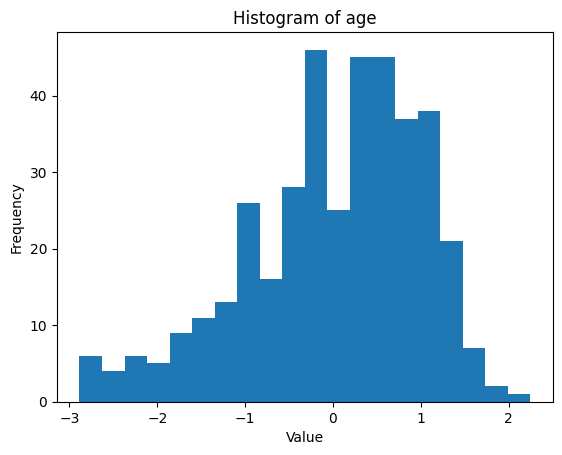

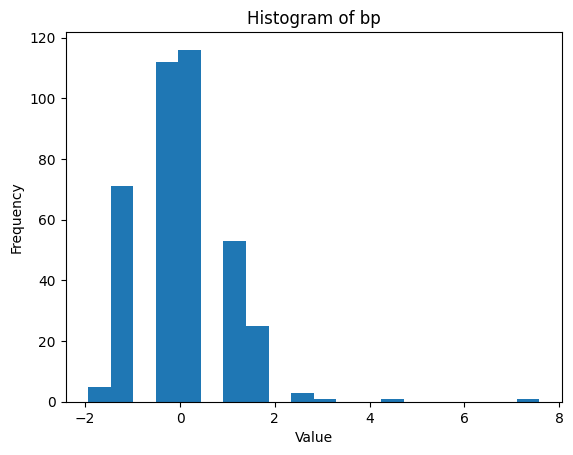

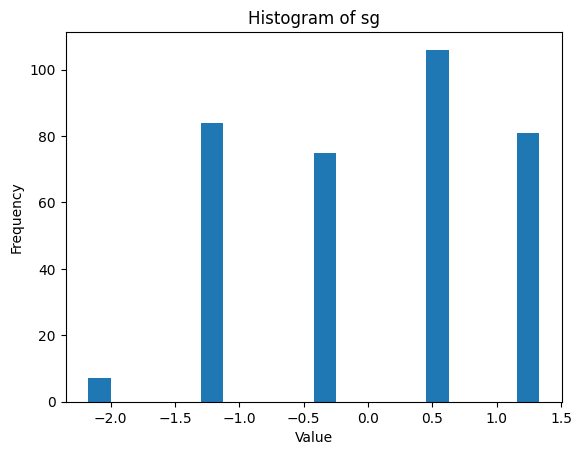

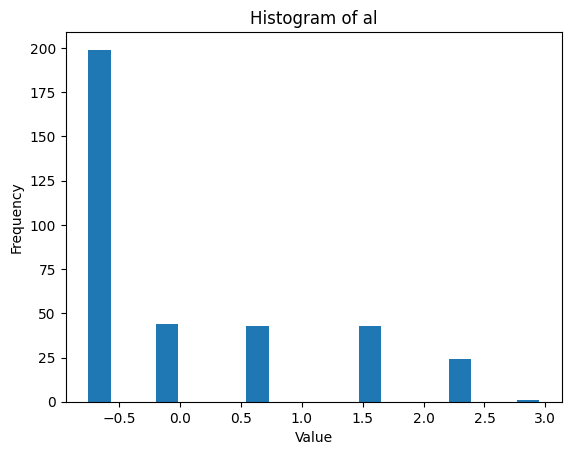

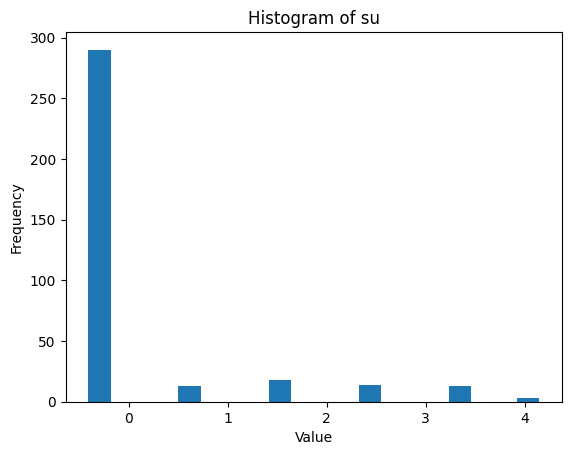

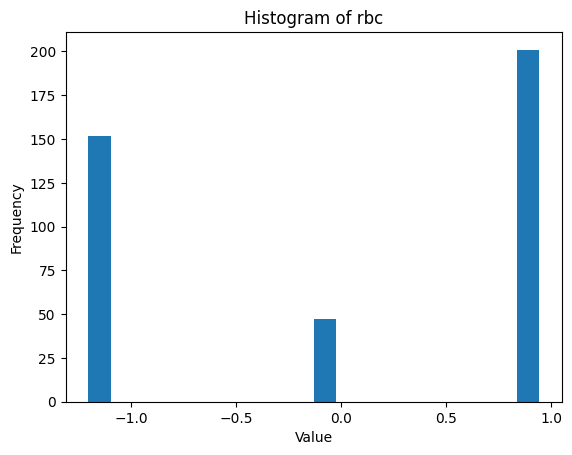

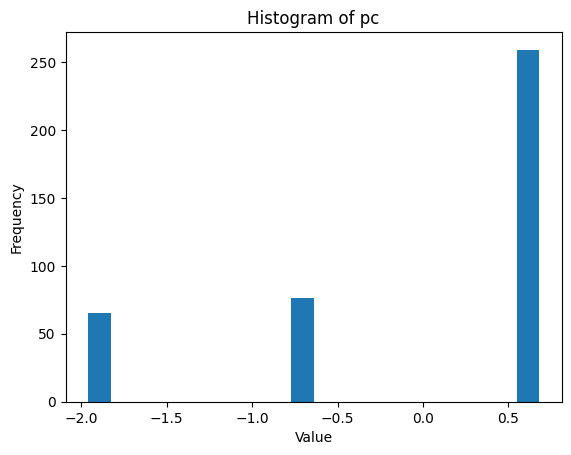

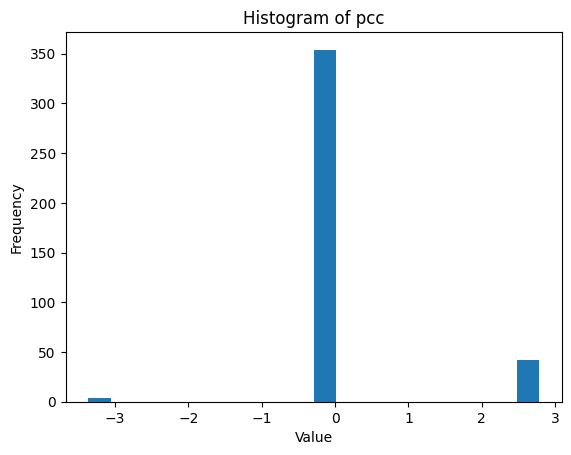

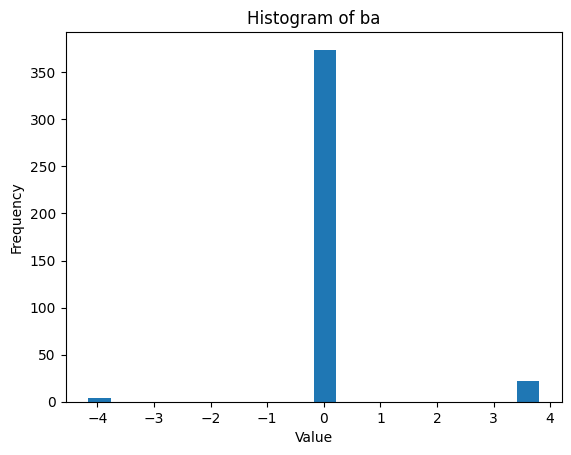

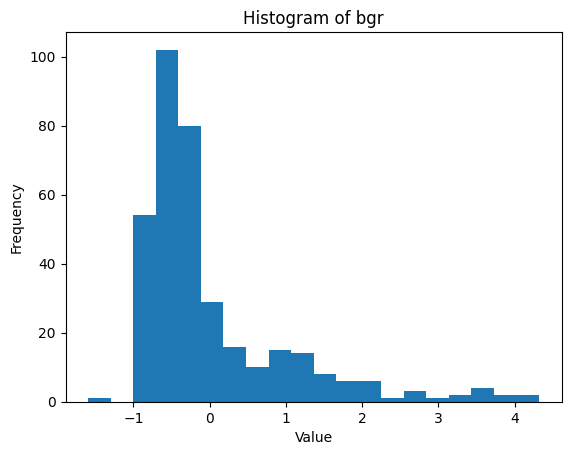

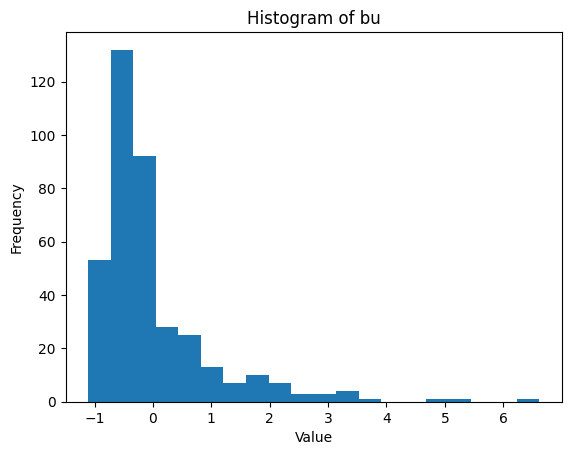

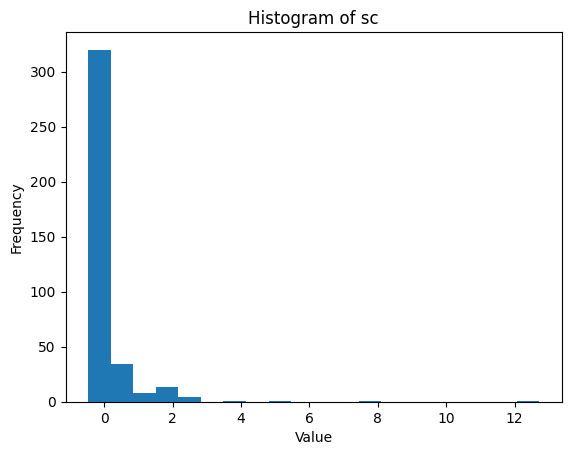

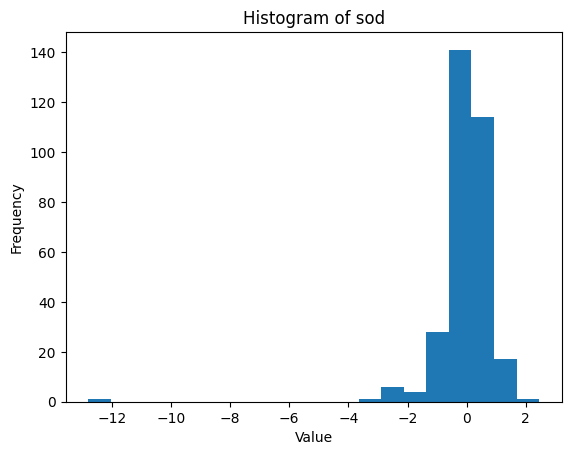

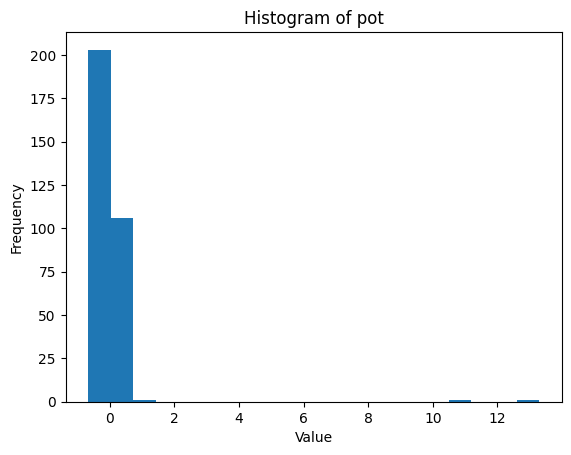

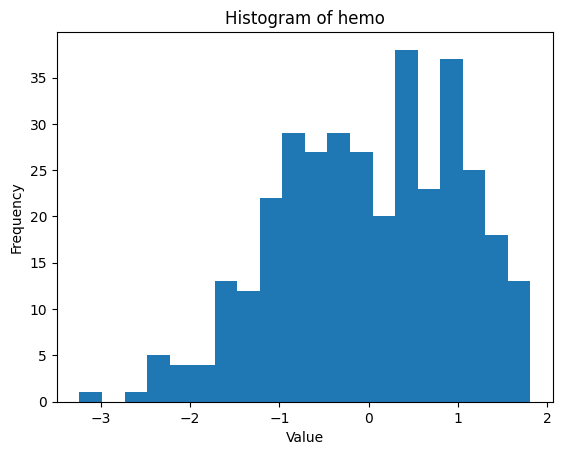

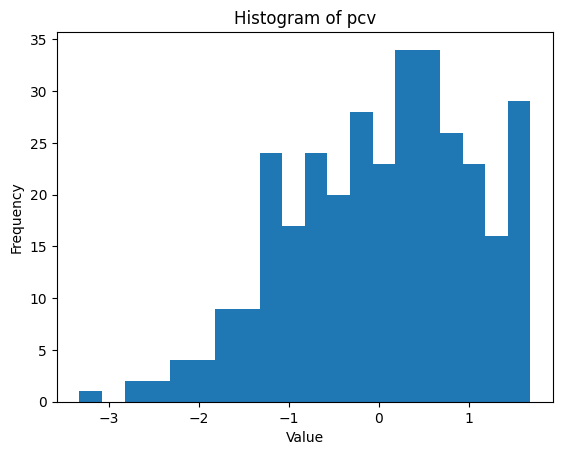

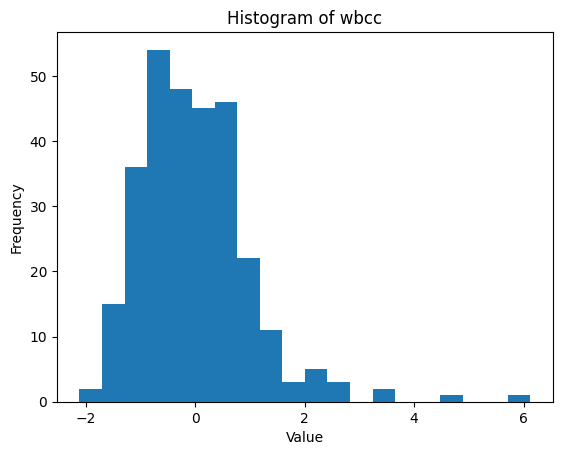

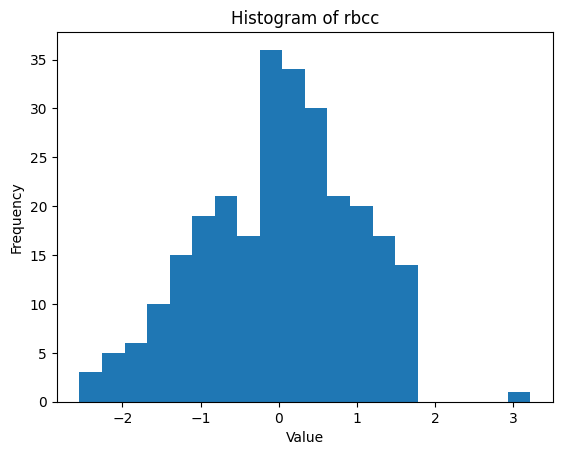

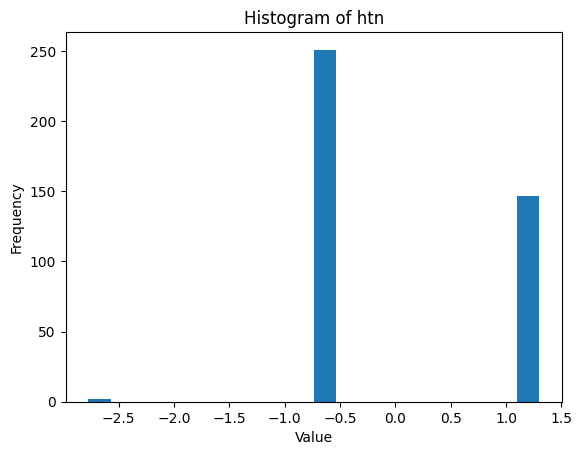

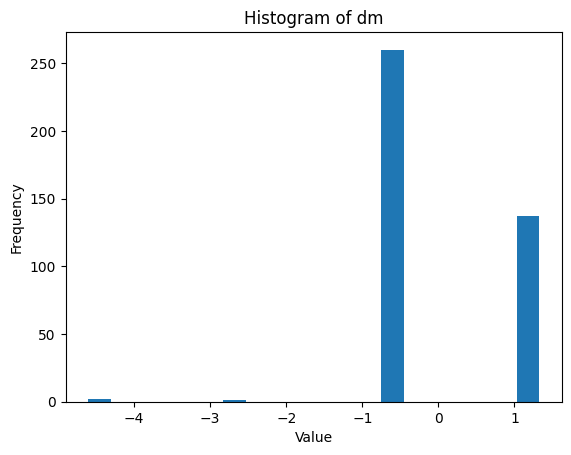

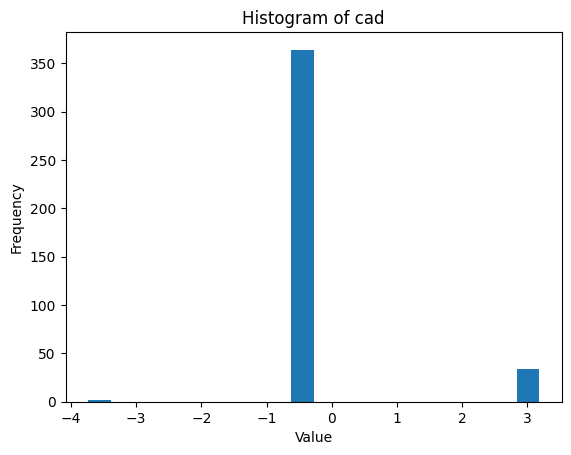

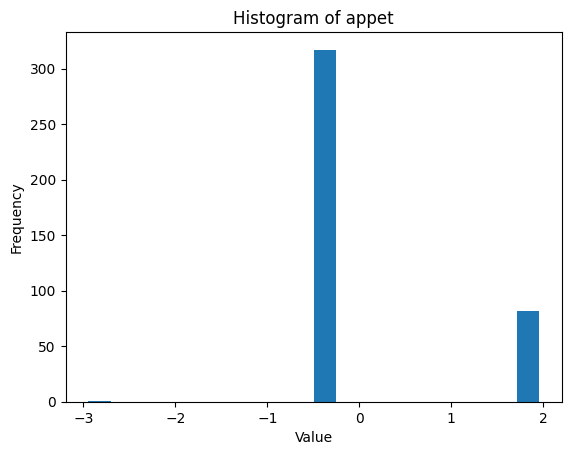

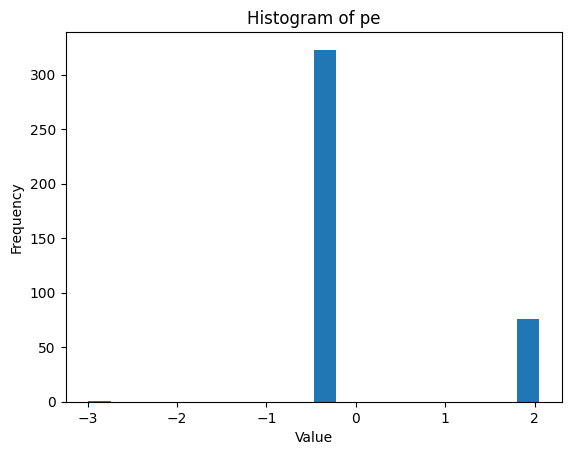

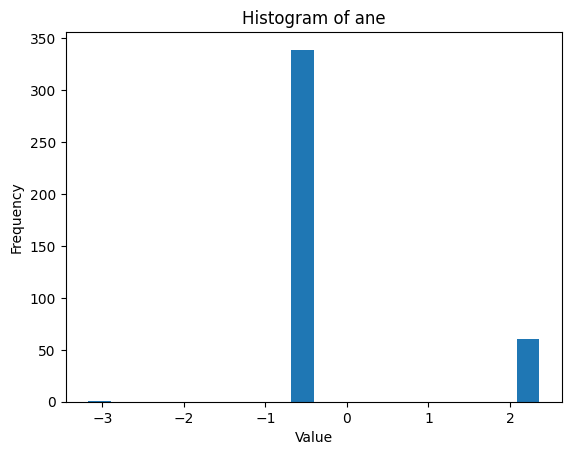

In [406]:
for column in scaled_X.columns:
    plt.hist(scaled_X[column], bins=20)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

### Q3
- Some covariates are skewed to the left(sod,hemo,pcv), some covariates are skewed to the right(bgr,bu,sc,pot,wbcc).
- None of the categorical variables have balanced outcome.
- Some covariates(bp,sg,al,su) only have certain values. It means they are categorical.

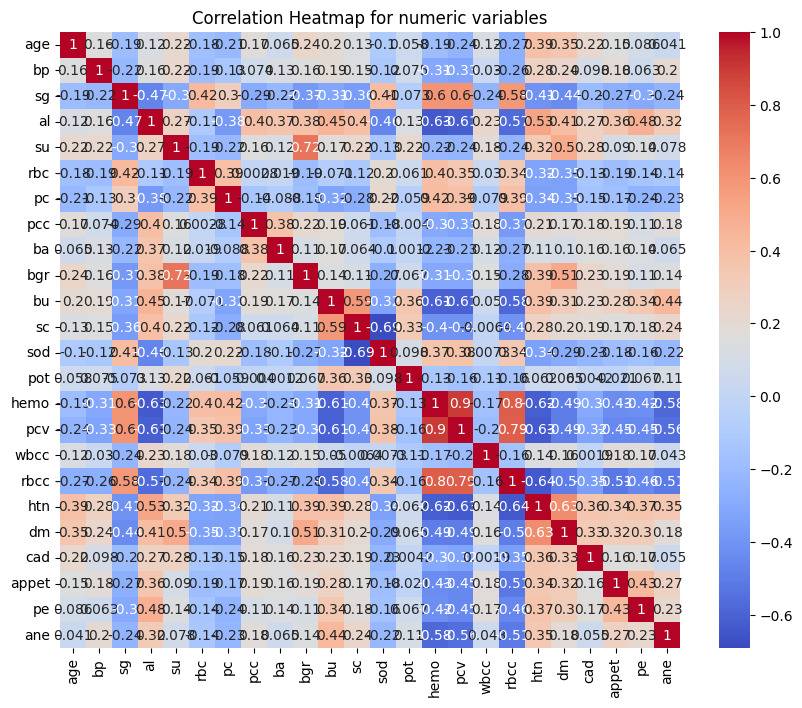

In [407]:
### Q4
correlation_matrix = scaled_X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for numeric variables")
plt.show()

### Q4.
- 'pot' and 'wbcc' do not seem to have relations with other covariates, while 'sg' and 'pcv' seem to be heavily correlated with other variables.
- There seems to be more negative correlation than postivie correlation.
- 'hemo','pcv','sg','al','rbcc' seems to be heavily correlated with each other.

In [408]:
### Q5
# Change the values first
revised_X = X.copy()

revised_X.update(scaled_X)

# Replace NaN with mean
mean_values = revised_X.mean()
revised_X.fillna(mean_values, inplace=True)

print(revised_X.shape)
print(revised_X.dtypes)

(400, 24)
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
dtype: object


C:\Users\Kong\AppData\Local\Temp\ipykernel_17368\2550574078.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.20518349 -1.20518349  0.94213676  0.94213676  0.94213676 -1.20518349
 -1.20518349  0.94213676  0.94213676 -0.13152336 -1.20518349 -0.13152336
 -1.20518349 -1.20518349  0.94213676 -1.20518349 -1.20518349 -1.20518349
 -1.20518349 -1.20518349 -0.13152336 -1.20518349  0.94213676 -1.20518349
  0.94213676 -1.20518349 -1.20518349  0.94213676 -1.20518349 -0.13152336
 -1.20518349 -1.20518349 -1.20518349 -0.13152336  0.94213676 -0.13152336
  0.94213676 -1.20518349 -0.13152336  0.94213676  0.94213676 -1.20518349
 -1.20518349 -0.13152336 -0.13152336 -1.20518349 -1.20518349 -1.20518349
  0.94213676  0.94213676 -1.20518349 -1.20518349 -1.20518349 -1.20518349
  0.94213676 -0.13152336  0.94213676 -1.20518349 -0.13152336 -1.20518349
 -1.20518349  0.94213676 -1.20518349 -0.13152336 -1.20518349 -1.20518349
 -0.13152336 

In [409]:
### Q6
# From the numerical variables, find outliers
z_scores = stats.zscore(revised_X)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
scaled_X_removed = scaled_X[~outliers]

# Fill NaN with mean value
scaled_X_removed = scaled_X_removed.fillna(scaled_X_removed.mean())

scaled_X_removed.shape

(315, 24)

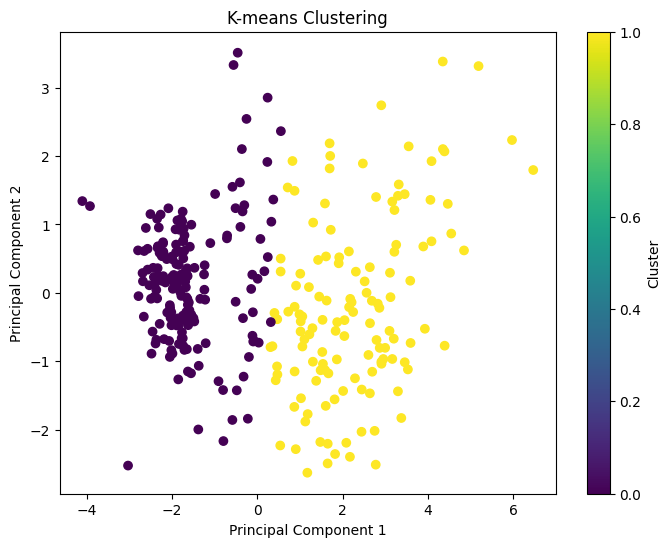

In [410]:
### Q7
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X_removed)

kmeans = KMeans(n_clusters=2, random_state=142857)
kmeans.fit(principal_components)
clusters = kmeans.fit_predict(scaled_X_removed)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [411]:
### Q8
y_removed = y[~outliers]

In [412]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_removed, y_removed, test_size=0.3, random_state=1)

### Q9
- One can use classification tree, since it is most natural choice.
- The other method for classification would be perception, or using coin flip. 50-60% score would be assigned.

In [413]:
cs_dt = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 

In [414]:
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [415]:
# Q10
pred = cs_dt.predict(X_test)
pred[:5]

array(['notckd', 'ckd', 'notckd', 'notckd', 'notckd'], dtype=object)

In [416]:
y_train.value_counts()

class 
ckd       118
notckd    102
Name: count, dtype: int64

[Text(0.5, 0.875, 'hemo <= 0.226\ngini = 0.497\nsamples = 220\nvalue = [118, 102]\nclass = notckd'),
 Text(0.3, 0.625, 'rbcc <= 0.352\ngini = 0.142\nsamples = 117\nvalue = [108, 9]\nclass = notckd'),
 Text(0.2, 0.375, 'sod <= 1.008\ngini = 0.069\nsamples = 112\nvalue = [108, 4]\nclass = notckd'),
 Text(0.1, 0.125, '\n  (...)  \n'),
 Text(0.3, 0.125, '\n  (...)  \n'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = ckd'),
 Text(0.7, 0.625, 'sg <= -0.127\ngini = 0.175\nsamples = 103\nvalue = [10, 93]\nclass = ckd'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = notckd'),
 Text(0.8, 0.375, 'htn <= 0.28\ngini = 0.021\nsamples = 94\nvalue = [1, 93]\nclass = ckd'),
 Text(0.7, 0.125, '\n  (...)  \n'),
 Text(0.9, 0.125, '\n  (...)  \n')]

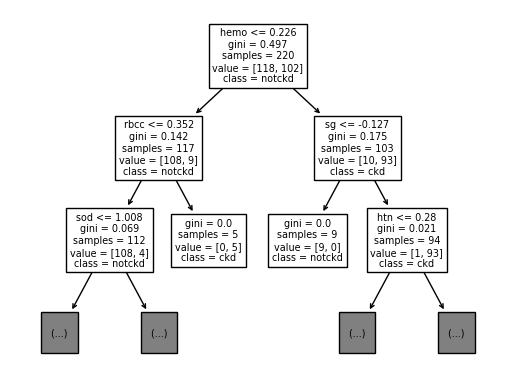

In [417]:
plot_tree(
    cs_dt, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd']
)

In [418]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,47,0
Yes,1,47


In [419]:
cs_dt.score(X_test, y_test)

0.9894736842105263

In [420]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        47
      notckd       1.00      0.98      0.99        48

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



### Q10
- From classification tree, we get score over 97%.
- With comparison using perception or coin flip, it will be hard to get to similar score.

In [421]:
### Q11
# Updating classification tree...
cs_dt_best = DecisionTreeClassifier(
    max_depth = 5, 
    random_state=0
    ) 
cs_dt_best.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [422]:
fea_imp = cs_dt_best.feature_importances_

In [423]:
sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

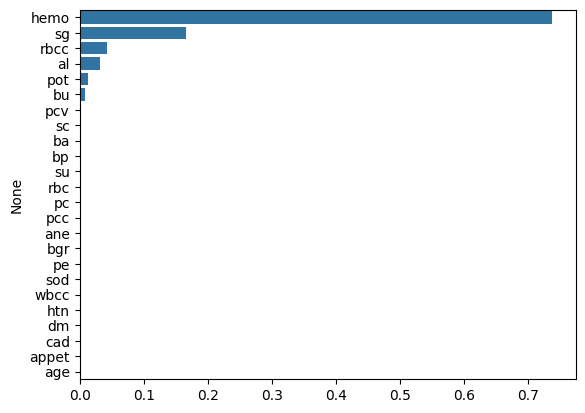

In [424]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

### Q11-Q12
- The importance of variates vary heavily, so including only certain variates may be a better way for classification.
- Classification tree seems to be a good way of classifying observations.

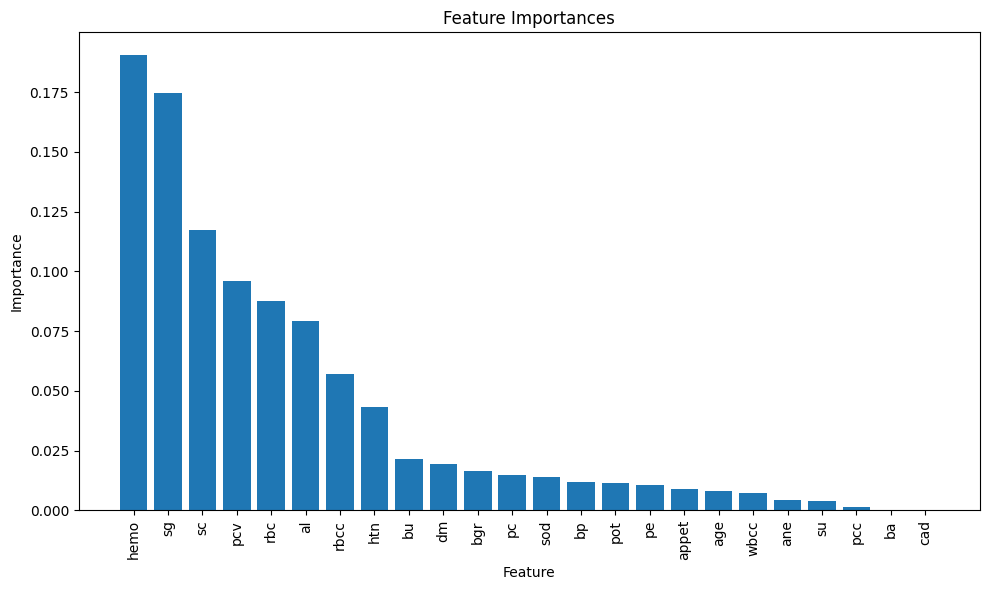

Index(['hemo', 'sg'], dtype='object')

In [425]:
# Q13
feature_importances = classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

feature_names[indices][:2]

### Q13
- 'hemo' and 'sg' are two most important features. Since they are directly related to health, it is natural that they are important.
- The fact that age is not very important implies that CKD is acquired rather than congenital.

In [435]:
# Q14
## We can try random forest classifier to improve classification using classification tree
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train, y_train)

accuracy = random_forest_classifier.score(X_test, y_test)
print(accuracy)

1.0


c:\Users\Kong\Desktop\Study\Statistics\Data Science Methods\venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Q14
The accuary of the classification improved from 0.97 to 1.0.

### Q16
